In [884]:
import warnings; 
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as pltb

In [885]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [886]:
pd.set_option('display.max_rows', 100)
pd.set_option("display.max_colwidth", 100)

In [887]:
orderlines = pd.read_csv('orderlines_clean.csv')
orders = pd.read_csv('orders_clean.csv')
brands = pd.read_csv('brands_clean.csv')
products = pd.read_csv('products_clean.csv')

df_list = [orderlines, orders, brands, products]
files = ['orderlines','orders','brands','products']

In [888]:
products.sample(10)

,sku,name,desc,price,promo_price,in_stock,type
10323,EVU0019,AER Evutec Karbon iPhone Case 8/7 / 6s Carbon + Magnetic holder,0.07mm thin sheath of material EvuSoft impact-resistant and non-slip for iPhone 8/7 / 6s Black,39.99,29.98,1,11865403
4276,TUC0262,Tucano AL-GO Case iPhone 6 / 6S Gray,Resistant Case for iPhone 6 Plus and 6s,19.90,16.98,0,11865403
7350,PAC2057,"Second hand - Apple iMac 20 ""Core 2 Duo 24GHz | 4GB RAM | 250GB HDD",Refurbished iMac 20 inch Core 2 Duo 24GHz | 4GB RAM | 250GB HDD,1499.00,355.59,0,"5,43E+15"
565,PAC0867,Apple Mac Pro 12-core 27GHz | 32GB RAM | 1TB Flash,New Mac Pro with 32GB RAM 1TB GPU 12 cores 2 Flash (MD878Y / A).,9449.00,8777.98,0,1282
9876,PRY0005-A,Open - Prynt Pocket Portable Printer iPhone Gray,Reconditioned Portable Printer for iPhone,159.95,123.66,0,11905404
5839,APP1889,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29GHz | RAM 16GB | 512GB PCIe SSD | Radeon Pro 460 4GB S...",New MacBook Pro 15-inch Core i7 Touch Bar 29Ghz with 16GB of RAM and 512GB of SSD PCIe (MLH32Y / A),3559.00,3387.58,0,2158
5901,WAC0172-A,"(Open) Wacom Bamboo tablet Spark sleeve up to 97 """,Bloc Smart notes.,159.90,78.93,0,1298
10223,THU0052,"See Thule 17L Backpack MacBook 15 ""Blue",Backpack with capacity 17 liters compartments for objects and MacBook 15in Case,99.99,89.99,0,1392
9421,QNA0256,Qnap NAS server TS-431P2-1G,NAS server with 1GB of RAM memory 2 Gigabit ports and advanced tools for Mac and PC,337.99,336.98,0,12175397
6786,REP0309,Microphone Repair iPhone 6 Plus,Repair service including parts and labor for iPhone 6 Plus,599.90,599.90,0,"1,44E+11"


In [889]:
products["sku_short"] = products.sku.str[0:3]

In [890]:
prod_brands = products.merge(brands, how = "left", left_on = "sku_short", right_on = "short")

In [891]:
prod_brands.drop(columns = ["sku_short", "short"], inplace = True)

In [892]:
prod_brands.rename(columns = {"long": "brand"}, inplace = True)

In [893]:
prod_brands["category"] = ""

In [894]:
def categorize_product(row):
    if row["brand"] == "Apple":
        if re.search(r"watch", row["name"], re.IGNORECASE):
            return "Smartwatch" 
        elif re.search(r"(case|sleeve|skin|cover|protect)", row["name"], re.IGNORECASE):
            return "Protection"
        elif re.search(r"(dock|cable|adapter|chargers|strap)", row["name"], re.IGNORECASE):
            return "Accessories"
        elif re.search(r"(iMac|Mac Mini|Mac Pro)", row["name"], re.IGNORECASE):
            return "Desktop computer"
        elif re.search(r"MacBook", row["name"], re.IGNORECASE):
            return "Laptop computer"
        elif re.search(r"iPhone", row["name"], re.IGNORECASE):
            return "Smartphone"
        elif re.search(r"iPad", row["name"], re.IGNORECASE):
            return "Tablet"
        elif re.search(r"iPod", row["name"], re.IGNORECASE):
            return "Audio"         
        elif re.search(r"(keyboard|mouse|trackpad)", row["name"], re.IGNORECASE):
            return "Keyboard & mouse"
        elif re.search(r"(monitor|display)", row["name"], re.IGNORECASE):
            return "Display"       
        else:
            return "Others"
    else:
        if re.search(r"(keyboard|mouse|keypad|numpad)", row["name"], re.IGNORECASE):
            return "Keyboard & mouse"
        elif re.search(r"(headphones|microphones|speaker|headset)", row["name"], re.IGNORECASE):
            return "Audio"  
        elif re.search(r"(drive|disk|raid|SSD|SSHD|SD|HDD)", row["name"], re.IGNORECASE):
            return "External storage"  
        elif re.search(r"(memory)", row["name"], re.IGNORECASE):
            return "Memory"
        elif re.search(r"(monitor|display)", row["name"], re.IGNORECASE):
            return "Display"  
        elif re.search(r"(case|sleeve|skin|cover|protect)", row["name"], re.IGNORECASE):
            return "Protection"  
        elif re.search(r"repair", row["name"], re.IGNORECASE):
            return "Repair services"
        elif re.search(r"camera", row["name"], re.IGNORECASE):
            return "Camera"
        elif re.search(r"(dock|cable|adapter|chargers|stand|trackpad|battery)", row["name"], re.IGNORECASE):
            return "Accessories"
        elif re.search(r"(hub|switch|router)", row["name"], re.IGNORECASE):
            return "Network"
        else:
            return "Others"

In [895]:
prod_brands["category"] = prod_brands.apply(categorize_product, axis = 1)

In [896]:
prod_brands[prod_brands.brand == "Apple"].sample(20)

,sku,name,desc,price,promo_price,in_stock,type,brand,category
9807,APP1152-A,Open - Case Apple iPhone 6 Plus / 6s Plus Silicone Case Red,Ultrathin silicone case and microfiber premium for iPhone 6 Plus / 6s Plus.,45.00,36.72,0,11865403,Apple,Protection
7813,APP2158,"Apple iPad Pro 10.5 ""Wi-Fi + Cellular 64GB Oro Rosa",Pro New iPad Wi-Fi + Cellular 64GB,889.00,862.00,1,106431714,Apple,Tablet
4351,APP1573,"Apple MacBook Retina 12 ""Core m3 11GHz | 8GB RAM | 256GB Silver",New MacBook Retina Display 12-inch Core 8GB RAM 256GB 11GHz m3 Flash Silver,1449.00,1355.58,0,1282,Apple,Laptop computer
7553,APP1518,"Apple iPad Smart Cover Case Pro 97 ""Red",Smart sleeve with different positions for cases Pro 97 inches.,59.00,47.99,0,12635403,Apple,Protection
4439,APP1589,Apple Watch Sport Silver Strap 38mm Yellow,Apple Watch Sport Aluminum Silver 38mm with sports strap yellow,369.00,369.00,0,24885185,Apple,Smartwatch
1193,APP0873,Apple iPad Air 2 Wi-Fi + Cellular 16GB Silver,New iPad Air 2 Wi-Fi + Cellular 16GB (MGH72TY / A).,549.00,528.99,0,12141714,Apple,Tablet
7789,APP2130,"Apple iPad Pro 10.5 ""Wi-Fi 512GB Oro Rosa",New iPad Pro 512GB Wi-Fi,1119.00,1085.00,0,106431714,Apple,Tablet
7431,AP20113,Like new - Apple Pencil,Refurbished Apple iPad Pencil Pro,109.00,82.99,0,1229,Apple,Others
9636,AP20419,Like new - Apple iPhone 64GB Space Gray 8,Apple iPhone 8 Free Refurbished 64GB Space Gray,809.00,699.00,0,113291716,Apple,Smartphone
5398,APP1702,Apple iPhone Black Lightning Dock,Stand with Lightning Dock Connector and iPhone,59.00,55.00,0,13615399,Apple,Accessories


In [897]:
prod_brands.sample(20)

,sku,name,desc,price,promo_price,in_stock,type,brand,category
9162,JBL0152,JBL Clip 2 Bluetooth Waterproof Mini Portable Speaker Black,waterproof speaker with high quality sound,59.99,54.98,0,5398,JBL,Audio
5947,CAR0008,Cardboard Safari Support TV iPad mini cardboard,Cardboard holder design retro TV for iPad mini,19.99,13.99,1,1216,NaN,Others
9208,PAC2474,Synology DS118 NAS Server | 10TB (1x10TB) Seagate Iron Wolf,1 bay NAS server with capacity for home use or small businesses,575.98,448.58,0,12175397,Pack,Others
1428,PAC1806,Synology DS1815 Pack + | 16GB RAM | WD 16TB Network,Pack Synology DS1815 + with 16GB RAM + 16TB (8x2TB) WD Red hard drives for Mac and PC,1966.57,1848.74,0,12175397,Pack,Others
449,JMO0044,Just Mobile AluFrame Alumino Bumper iPhone 5 / 5S Silver,Aluminum Bumper iPhone 5 / 5S resistant.,49.99,25.99,0,11865403,Just Mobile,Others
1159,APP1927,Apple Mac mini Core i7 3GHz | 8GB RAM | 1TB HDD (MGEN2YP / A),Apple desktop Mac mini Core i7 3GHz | 8GB RAM | 1TB HDD (MGEN2YP / A),1099.00,1044.00,1,1282,Apple,Desktop computer
7983,PAC1942,Apple Mac Pro 35GHz 6 cores | 64GB RAM | 256GB PCIe SSD,New Mac Pro with 64GB of RAM and two 6-core GPU 35GHz AMD FirePro D500 (MD878Y / A),4895.59,4099.00,0,21632158,Pack,External storage
6829,REP0377,Full Screen Repair iPad Mini 3,Repair service including parts and labor for iPad Mini 3,229.99,229.98,0,"1,44E+11",Repair,Repair services
4638,IFX0074,iFixit piece Earpiece Speaker iPhone 6,Handset internal speaker for iPhone 6,7.99,5.98,1,21485407,iFixit,Audio
3187,SAN0105,Sandisk Extreme SSD 500 240GB Portable USB 3.0,240GB SSD notebook.,139.99,137.79,0,12215397,SanDisk,External storage


In [898]:
# def categorize_product(name):
#         if re.search('iMac', name, re.IGNORECASE):
#             return "Desktop computer"
#         elif re.search('MacBook', name, re.IGNORECASE):
#             return "Laptop computer"
#         elif re.search('iPhone', name, re.IGNORECASE):
#             return "Smartphone"
#         elif re.search('iPad', name, re.IGNORECASE):
#             return  "Tablet"
# prod_brands["category"] = prod_brands['name'].apply(categorize_product)

In [899]:
prod_brands.category.value_counts()

Others              3038
Protection          1987
External storage    1598
Accessories          803
Laptop computer      477
Audio                437
Desktop computer     343
Display              339
Smartphone           270
Memory               243
Tablet               204
Repair services      174
Smartwatch           147
Network              129
Keyboard & mouse     125
Camera                72
Name: category, dtype: int64

In [900]:
prod_orderlines = orderlines.merge(prod_brands, how = "left")

In [901]:
prod_orderlines.head(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,promo_price,in_stock,type,brand,category
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,resistant cover and thin beveled edges for iPhone SE / 5s / 5,34.99,19.99,0,11865403,Otterbox,Protection
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional use with two HDMI ports for Mac and PC,429.00,398.99,0,1296,LG,Display
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV Glasses,cuadricóptero wireless remote control with 25 minutes of autonomous control FLYPAD and FPV Glass...,699.00,568.99,0,11905404,Parrot,Others
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-inch SATA 6Gb / s for Mac and PC users.,79.00,63.99,0,12655397,Western Digital,External storage
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad and iPod speaker.,29.90,27.99,1,5398,JBL,Audio
5,1119115,299544,0,1,APP1582,1137.99,2017-01-01 01:17:21,1137.99,True,"Apple MacBook Air 13 ""i7 22 Ghz | 8GB RAM | 128GB Flash",laptop MacBook Air 13 inch i7 22GHz 8GB RAM 128GB Flash (MJVE2Y / A),1219.00,1164.58,0,1282,Apple,Laptop computer
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,49.98,1,12755395,OWC,External storage
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,True,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s / 5c / 4S,22.95,16.98,0,5720,iOttie,Others
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,True,"Apple 85W MagSafe 2 charger MacBook Pro screen Retina 15 ""(OEM)",Apple MagSafe 2 Charger for MacBook Pro 15-inch Retina 85W unboxed,89.00,64.99,1,13005399,Apple,Laptop computer
9,1119125,299548,0,5,SPE0132,35.14,2017-01-01 02:02:20,175.70,True,"Speck SeeThru Satin MacBook Pro Case 13 ""Black",protection Macbooks rigid housing 13 inches.,49.90,39.99,0,13835403,Spek SeeThru,Protection


In [902]:
prod_orderlines.drop(columns = ["in_stock", "type", "id", "product_id", "check_orders"], inplace = True)

In [903]:
discount = prod_orderlines.merge(orders, how = "left", left_on = "id_order", right_on = "order_id")

In [904]:
discount.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,promo_price,brand,category,order_id,created_date,total_paid,state,check_orders
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,resistant cover and thin beveled edges for iPhone SE / 5s / 5,34.99,19.99,Otterbox,Protection,299539.00,2017-01-01 00:07:19,18.99,Shopping Basket,True
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional use with two HDMI ports for Mac and PC,429.00,398.99,LG,Display,299540.00,2017-01-01 00:19:45,399.00,Shopping Basket,True
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV Glasses,cuadricóptero wireless remote control with 25 minutes of autonomous control FLYPAD and FPV Glass...,699.00,568.99,Parrot,Others,299541.00,2017-01-01 00:20:57,474.05,Shopping Basket,True
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-inch SATA 6Gb / s for Mac and PC users.,79.00,63.99,Western Digital,External storage,299542.00,2017-01-01 00:51:40,68.39,Shopping Basket,True
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad and iPod speaker.,29.90,27.99,JBL,Audio,299543.00,2017-01-01 01:06:38,23.74,Shopping Basket,True


In [905]:
discount.drop(columns = ["check_orders"], inplace = True)

In [906]:
discount_comp = discount[discount.state == "Completed"].copy()

In [907]:
discount_comp.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,promo_price,brand,category,order_id,created_date,total_paid,state
6,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,49.98,OWC,External storage,299545.00,2017-01-01 01:51:47,51.48,Completed
7,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s / 5c / 4S,22.95,16.98,iOttie,Others,299546.00,2017-01-01 01:57:34,18.99,Completed
8,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,"Apple 85W MagSafe 2 charger MacBook Pro screen Retina 15 ""(OEM)",Apple MagSafe 2 Charger for MacBook Pro 15-inch Retina 85W unboxed,89.00,64.99,Apple,Laptop computer,295347.00,2017-01-01 02:02:38,72.19,Completed
10,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB | 2TB Drive Fusion",IMac desktop computer 27 inch Retina 5K RAM 32GB 2TB Drive Fusion (MK462Y / A).,3209.00,2667.98,Pack,External storage,299549.00,2017-01-02 10:00:20,2565.99,Completed
17,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with 555MB for Mac and PC.,76.99,70.70,Crucial,External storage,299556.00,2017-01-01 02:30:08,65.89,Completed


In [908]:
revenue = discount_comp.total_price.sum()
revenue

15373601.439999998

In [909]:
discount.dtypes

id_order              int64
product_quantity      int64
sku                  object
unit_price          float64
date                 object
total_price         float64
name                 object
desc                 object
price               float64
promo_price         float64
brand                object
category             object
order_id            float64
created_date         object
total_paid          float64
state                object
dtype: object

In [910]:
discount_comp.dtypes

id_order              int64
product_quantity      int64
sku                  object
unit_price          float64
date                 object
total_price         float64
name                 object
desc                 object
price               float64
promo_price         float64
brand                object
category             object
order_id            float64
created_date         object
total_paid          float64
state                object
dtype: object

In [911]:
discount['date'] = pd.to_datetime(discount['date'])

In [912]:
discount_comp['date'] = pd.to_datetime(discount_comp['date'])

In [913]:
discount = discount.assign(year = discount['date'].dt.strftime('%Y'), month = discount['date'].dt.strftime('%b'))

In [914]:
discount_comp = discount_comp.assign(year = discount_comp['date'].dt.strftime('%Y'), month = discount['date'].dt.strftime('%b'))

In [915]:
discount["discount"] = (discount["price"] - discount["unit_price"]) / discount["price"] * 100

In [916]:
discount["discounted"] = discount.discount > 0

In [917]:
discount_comp["discount"] = (discount_comp["price"] - discount_comp["unit_price"]) / discount_comp["price"] * 100

In [918]:
discount_comp["discounted"] = discount_comp.discount > 0

In [921]:
discount.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,promo_price,brand,category,order_id,created_date,total_paid,state,year,month,discount,discounted
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,resistant cover and thin beveled edges for iPhone SE / 5s / 5,34.99,19.99,Otterbox,Protection,299539.00,2017-01-01 00:07:19,18.99,Shopping Basket,2017,Jan,45.73,True
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional use with two HDMI ports for Mac and PC,429.00,398.99,LG,Display,299540.00,2017-01-01 00:19:45,399.00,Shopping Basket,2017,Jan,6.99,True
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV Glasses,cuadricóptero wireless remote control with 25 minutes of autonomous control FLYPAD and FPV Glass...,699.00,568.99,Parrot,Others,299541.00,2017-01-01 00:20:57,474.05,Shopping Basket,2017,Jan,32.18,True
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-inch SATA 6Gb / s for Mac and PC users.,79.00,63.99,Western Digital,External storage,299542.00,2017-01-01 00:51:40,68.39,Shopping Basket,2017,Jan,13.43,True
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad and iPod speaker.,29.90,27.99,JBL,Audio,299543.00,2017-01-01 01:06:38,23.74,Shopping Basket,2017,Jan,20.60,True


In [630]:
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# discount_comp['month'] = pd.Categorical(discount_comp['month'], categories=months, ordered=True)
# discount_comp_avg = discount_comp.groupby(['year','month']).agg({'discount': 'mean'})
# discount_comp_avg=discount_comp_avg.loc[('2017','Jan'):('2018','Mar'),:]
# discount_comp_avg.reset_index(inplace=True)
# # discount_comp_avg['total_price_M'] = discount_comp_avg['total_price']/1e6

In [631]:
# sns.lineplot(data = discount_comp_avg, x = "month", y = "discount", hue = "year")
# plt.show()

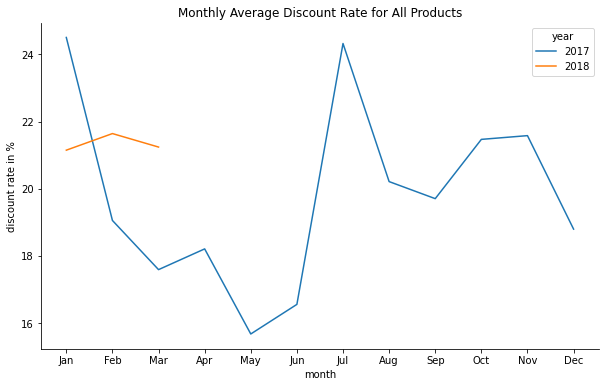

In [922]:
plt.subplots(figsize = (10, 6))
sns.lineplot(data = discount_comp, x = "month", y = "discount", hue = "year", ci = None)
sns.despine()
plt.title("Monthly Average Discount Rate for All Products");
plt.ylabel("discount rate in %");

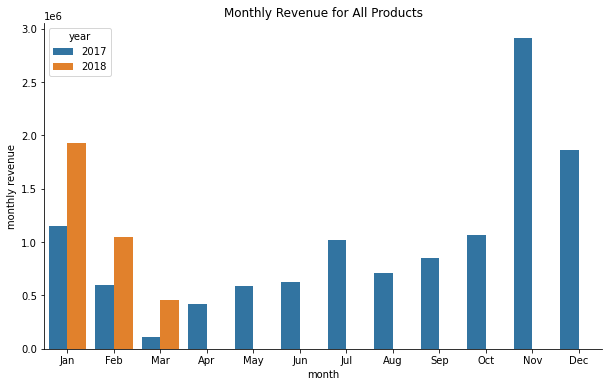

In [923]:
plt.subplots(figsize = (10, 6))
sns.barplot(data = discount_comp, x = "month", y = "total_price", estimator = sum, hue = "year", ci = None)
sns.despine()
plt.title("Monthly Revenue for All Products");
plt.ylabel("monthly revenue");

In [924]:
top_sold = discount_comp.groupby("sku").product_quantity.count().sort_values(ascending = False).head(30).reset_index()

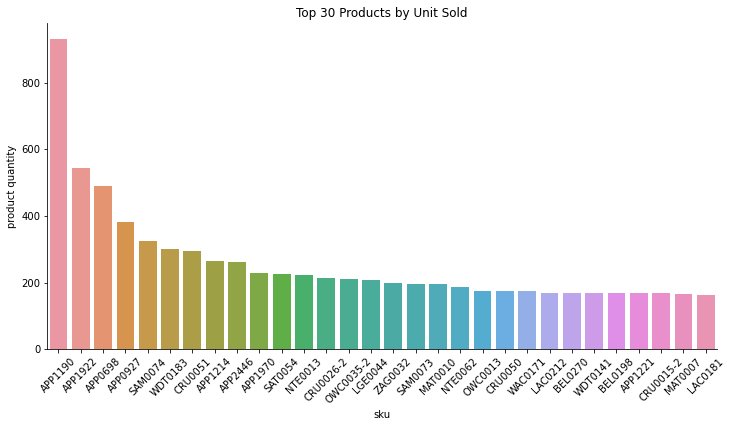

In [925]:
plt.subplots(figsize = (12, 6))
sns.barplot(data = top_sold, x = "sku", y = "product_quantity")
sns.despine()
plt.title("Top 30 Products by Unit Sold");
plt.ylabel("product quantity");
plt.xticks(rotation = 45);

In [927]:
top_sold_sku = top_sold.sku.to_list()

In [928]:
top_sold_df = discount_comp[discount_comp.sku.isin(top_sold_sku)]

In [929]:
top_sold_rev = top_sold_df.total_price.sum()
top_sold_rev

1019933.68

In [930]:
len(top_sold_df)

7754

In [931]:
len(top_sold_df[top_sold_df.discounted == True])

7180

In [932]:
top_rev = discount_comp.groupby("sku").total_price.sum().sort_values(ascending = False).head(30).reset_index()

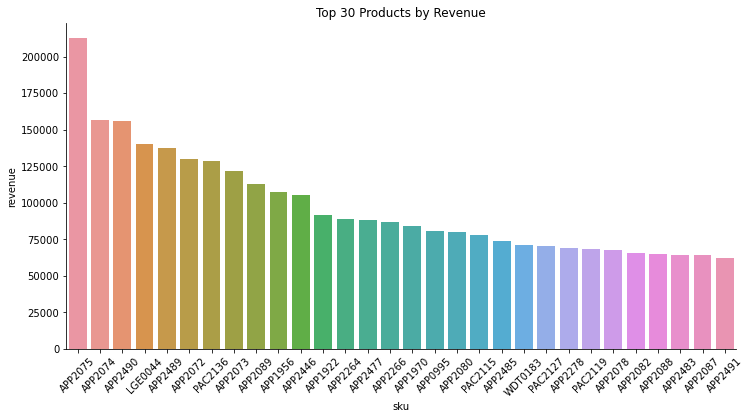

In [933]:
plt.subplots(figsize = (12, 6))
sns.barplot(data = top_rev, x = "sku", y = "total_price")
sns.despine()
plt.title("Top 30 Products by Revenue");
plt.ylabel("revenue");
plt.xticks(rotation = 45);

In [934]:
top_rev_sku = top_rev.sku.to_list()

In [935]:
top_rev_df = discount_comp[discount_comp.sku.isin(top_rev_sku)]

In [936]:
top_rev_rev = top_rev_df.total_price.sum()
top_rev_rev

2928340.75

In [937]:
len(top_sold_df)

7754

In [938]:
len(top_rev_df[top_rev_df.discounted == True])

2778

In [939]:
top_rev_cat = discount_comp.groupby("category").total_price.sum().sort_values(ascending = False)
top_rev_cat

category
Laptop computer    3026018.42
External storage   2797062.54
Others             2791697.48
Smartphone         1943745.27
Desktop computer   1291007.03
Display             884378.64
Tablet              530002.09
Memory              440200.52
Protection          373835.79
Accessories         346874.60
Audio               345741.89
Smartwatch          321246.15
Keyboard & mouse    161775.52
Network              82645.77
Camera               26107.01
Repair services      11262.72
Name: total_price, dtype: float64

In [940]:
discount_comp_cat = discount_comp[discount_comp.category.isin(["Laptop computer", "External storage", "Smartphone", "Desktop computer", "Display"])]
discount_comp_cat17 = discount_comp_cat[discount_comp_cat.year == "2017"]
discount_comp_cat18 = discount_comp_cat[discount_comp_cat.year == "2018"]

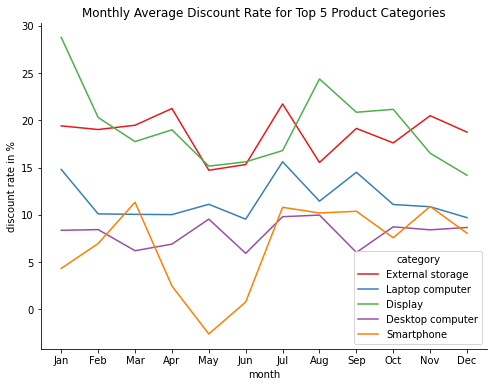

In [941]:
plt.subplots(figsize = (8, 6))
sns.lineplot(data = discount_comp_cat, x = "month", y = "discount", hue = "category", palette = "Set1", ci = None)
sns.despine()
plt.title("Monthly Average Discount Rate for Top 5 Product Categories");
plt.ylabel("discount rate in %");
plt.savefig("ProdDisc.jpg", bbox_inches = "tight", dpi = 150)

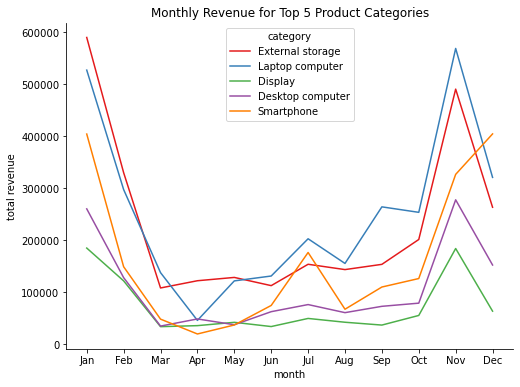

In [942]:
plt.subplots(figsize = (8, 6))
sns.lineplot(data = discount_comp_cat, x = "month", y = "total_price", estimator = "sum", hue = "category", palette = "Set1", ci = None)
sns.despine()
plt.title("Monthly Revenue for Top 5 Product Categories");
plt.ylabel("total revenue");
plt.savefig("ProdRev.jpg", bbox_inches = "tight", dpi = 150)

In [943]:
top_rev_brand = discount_comp.groupby("brand").total_price.sum().sort_values(ascending = False)

In [944]:
discount_comp_brand = discount_comp[discount_comp.brand.isin(["Apple", "LaCie", "OWC", "Wacom", "LG"])]

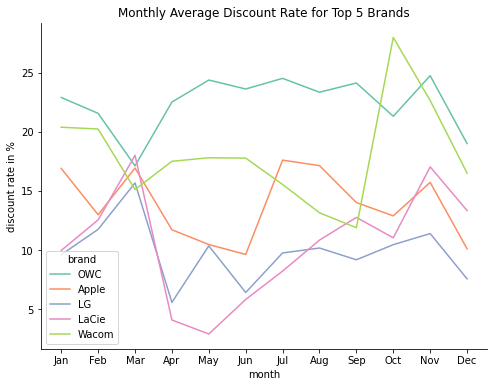

In [945]:
plt.subplots(figsize = (8, 6))
sns.lineplot(data = discount_comp_brand, x = "month", y = "discount", hue = "brand", palette = "Set2", ci = None)
sns.despine()
plt.title("Monthly Average Discount Rate for Top 5 Brands");
plt.ylabel("discount rate in %");
plt.savefig("BrandDisc.jpg", bbox_inches = "tight", dpi = 150)

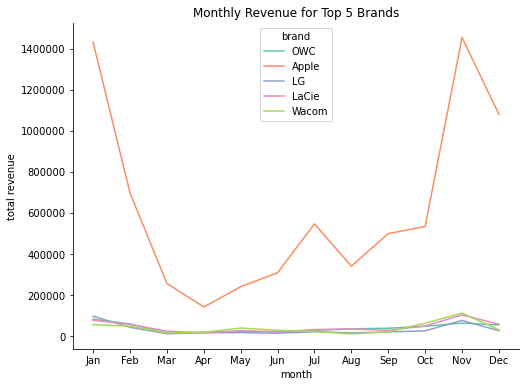

In [947]:
plt.subplots(figsize = (8, 6))
sns.lineplot(data = discount_comp_brand, x = "month", y = "total_price", estimator = "sum", hue = "brand", palette = "Set2", ci = None)
sns.despine()
plt.title("Monthly Revenue for Top 5 Brands");
plt.ylabel("total revenue");
plt.ticklabel_format(style = "plain", axis = "y");
plt.savefig("BrandRev.jpg", bbox_inches = "tight", dpi = 150)

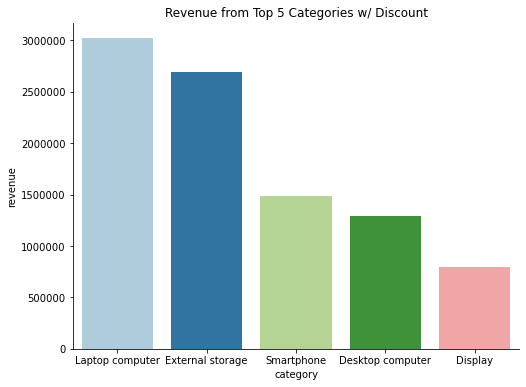

In [949]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = discount_comp_cat[discount_comp_cat.discounted == True], x = "category", 
            y = "total_price", order = ["Laptop computer", "External storage", "Smartphone", 
            "Desktop computer", "Display"], estimator = sum, palette = "Paired", ci = None)
sns.despine()
plt.title("Revenue from Top 5 Categories w/ Discount");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");

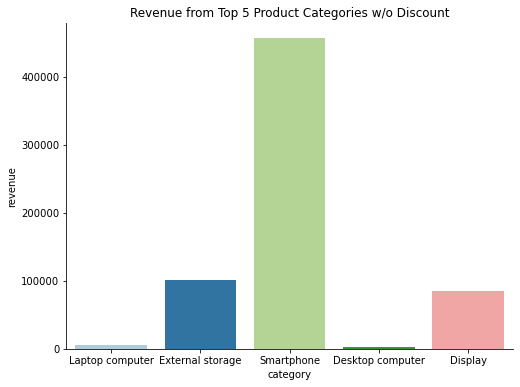

In [950]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = discount_comp_cat[discount_comp_cat.discounted == False], x = "category", 
            y = "total_price", order = ["Laptop computer", "External storage", "Smartphone", "Desktop computer", 
            "Display"], estimator = sum, palette = "Paired", ci = None)
sns.despine()
plt.title("Revenue from Top 5 Product Categories w/o Discount");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");

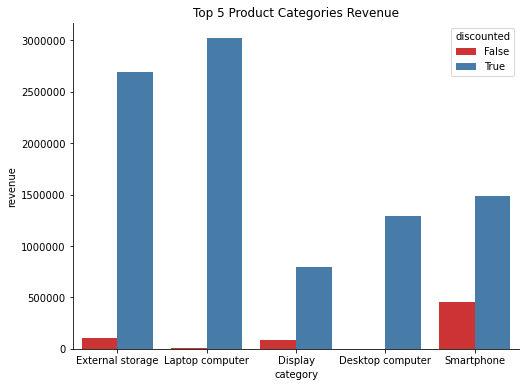

In [988]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = discount_comp_cat, x = "category", y = "total_price", hue = "discounted", estimator = sum, 
            palette = "Set1", ci = None)
sns.despine()
plt.title("Top 5 Product Categories Revenue");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");
plt.savefig("ProdBar.jpg", bbox_inches = "tight", dpi = 150)

In [964]:
len(discount_comp_cat[discount_comp_cat.discounted == False])

1229

In [966]:
len(discount_comp_cat[discount_comp_cat.discounted == True])

18713

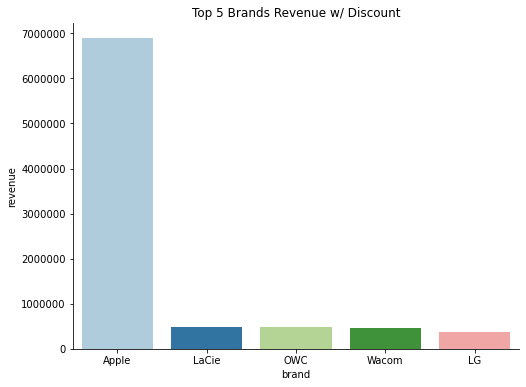

In [952]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = discount_comp_brand[discount_comp_brand.discounted == True], x = "brand", 
            y = "total_price", order = ["Apple", "LaCie", "OWC", "Wacom", "LG"], estimator = sum, 
            palette = "Paired", ci = None)
sns.despine()
plt.title("Top 5 Brands Revenue w/ Discount");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");

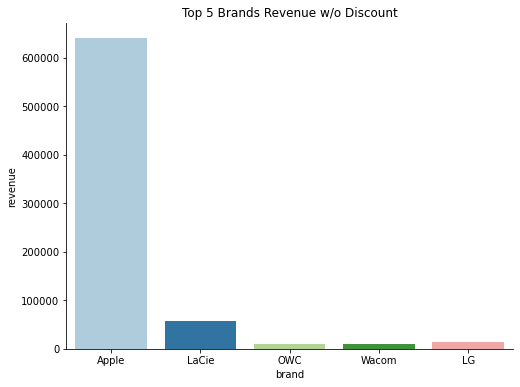

In [953]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = discount_comp_brand[discount_comp_brand.discounted == False], x = "brand", 
            y = "total_price", order = ["Apple", "LaCie", "OWC", "Wacom", "LG"], estimator = sum, 
            palette = "Paired", ci = None)
sns.despine()
plt.title("Top 5 Brands Revenue w/o Discount");
plt.ylabel("revenue"); 
plt.ticklabel_format(style = "plain", axis = "y");

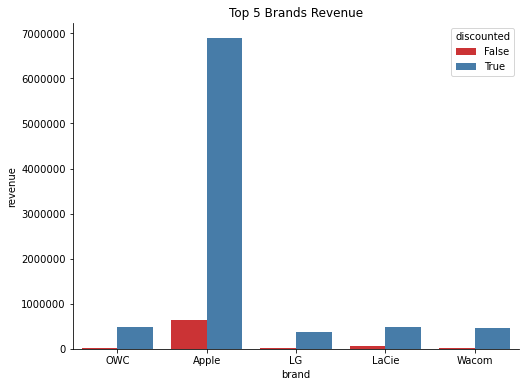

In [972]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = discount_comp_brand, x = "brand", y = "total_price", hue = "discounted", 
            estimator = sum, palette = "Set1", ci = None)
sns.despine()
plt.title("Top 5 Brands Revenue");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");
plt.savefig("BrandBar.jpg", bbox_inches = "tight", dpi = 150)

In [962]:
len(discount_comp_brand[discount_comp_brand.discounted == True])

20400

In [963]:
len(discount_comp_brand[discount_comp_brand.discounted == False])

1722

In [955]:
discount.state.value_counts()

Shopping Basket    167361
Completed           61403
Place Order         34347
Pending             18497
Cancelled            8944
Name: state, dtype: int64

In [956]:
discount_nc = discount[discount.state.isin(["Shopping Basket", "Pending", "Cancelled"])]
discount_nc.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,promo_price,brand,category,order_id,created_date,total_paid,state,year,month,discount,discounted
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,resistant cover and thin beveled edges for iPhone SE / 5s / 5,34.99,19.99,Otterbox,Protection,299539.00,2017-01-01 00:07:19,18.99,Shopping Basket,2017,Jan,45.73,True
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional use with two HDMI ports for Mac and PC,429.00,398.99,LG,Display,299540.00,2017-01-01 00:19:45,399.00,Shopping Basket,2017,Jan,6.99,True
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV Glasses,cuadricóptero wireless remote control with 25 minutes of autonomous control FLYPAD and FPV Glass...,699.00,568.99,Parrot,Others,299541.00,2017-01-01 00:20:57,474.05,Shopping Basket,2017,Jan,32.18,True
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-inch SATA 6Gb / s for Mac and PC users.,79.00,63.99,Western Digital,External storage,299542.00,2017-01-01 00:51:40,68.39,Shopping Basket,2017,Jan,13.43,True
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad and iPod speaker.,29.90,27.99,JBL,Audio,299543.00,2017-01-01 01:06:38,23.74,Shopping Basket,2017,Jan,20.60,True


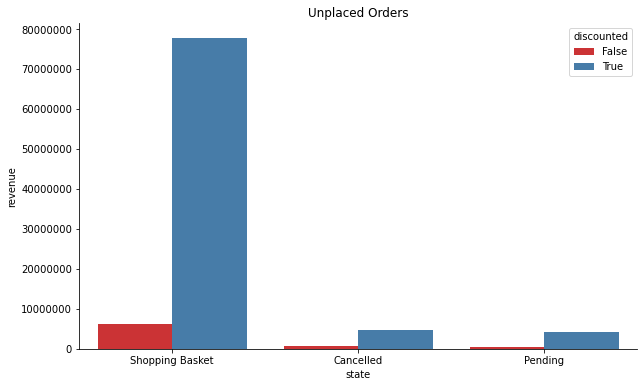

In [967]:
plt.subplots(figsize = (10, 6))
sns.barplot(data = discount_nc, x = "state", y = "total_price", hue = "discounted", estimator = sum, 
            palette = "Set1", ci = None)
sns.despine()
plt.title("Unplaced Orders");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");

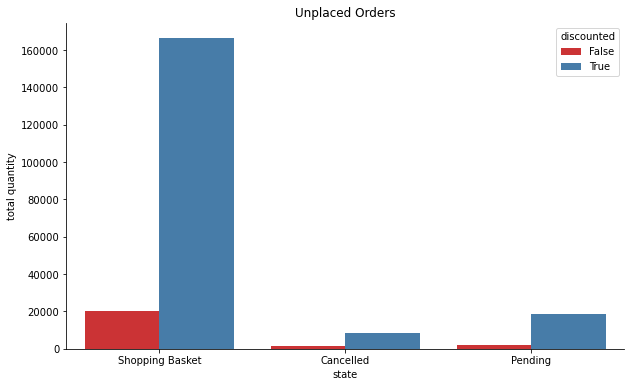

In [973]:
plt.subplots(figsize = (10, 6))
sns.barplot(data = discount_nc, x = "state", y = "product_quantity", hue = "discounted", estimator = sum, 
            palette = "Set1", ci = None)
sns.despine()
plt.title("Unplaced Orders");
plt.ylabel("total quantity");
plt.ticklabel_format(style = "plain", axis = "y");
plt.savefig("Incomplete.jpg", bbox_inches = "tight", dpi = 150)

In [959]:
len(discount[discount.discounted == True])

262745

In [960]:
len(discount[discount.discounted == False])

29542

In [961]:
len(discount)

292287

In [978]:
discount_comp_cat_d = discount_comp_cat[discount_comp_cat.discounted == True]
discount_comp_cat_nd = discount_comp_cat[discount_comp_cat.discounted == False]
discount_cat_samp = discount_comp_cat_d.sample(n = 1229)

In [980]:
cat_samp = pd.concat([discount_comp_cat_nd, discount_cat_samp])

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,promo_price,brand,category,order_id,created_date,total_paid,state,year,month,discount,discounted
246,299776,1,BNQ0053,398.99,2017-01-01 16:34:28,398.99,"PD2700Q Monitor Benq 27 ""QHD 10bit HDMI pivotable",2K monitor 27 for design professionals sRGB 100% 350cd / m2 animation and editing mode for Mac a...,337.00,336.99,BenQ,Display,299776.00,2017-01-01 16:49:33,398.99,Completed,2017,Jan,-18.39,False
296,299829,1,LAC0171,275.49,2017-01-01 17:50:48,275.49,LaCie Porsche Design Desktop Drive 8TB USB 3.0 External Hard Drive,External Hard Drive 8TB 35-inch USB 3.0 for Mac and PC.,249.99,205.99,LaCie,External storage,299829.00,2017-01-01 18:00:47,282.48,Completed,2017,Jan,-10.20,False
383,299909,1,LAC0159,176.69,2017-01-01 19:50:09,176.69,LaCie Porsche Design Desktop Drive 5TB USB 3.0 External Hard Drive,External Hard Drive 5TB 35-inch USB 3.0 for Mac and PC.,174.99,147.79,LaCie,External storage,299909.00,2017-01-01 20:08:11,183.68,Completed,2017,Jan,-0.97,False
410,299947,1,APP1482,549.00,2017-01-01 20:32:33,549.00,Apple iPhone 64GB Silver,New iPhone SE with 4-inch screen 64 free GB.,549.00,550.33,Apple,Smartphone,299947.00,2017-01-01 20:36:30,549.00,Completed,2017,Jan,0.00,False
490,300035,1,APP1641,909.00,2017-01-01 22:05:04,909.00,Apple iPhone 7 Plus 32GB Silver,New Apple iPhone 32GB 7 plus free Plata,779.00,764.00,Apple,Smartphone,300035.00,2017-01-01 22:22:56,909.00,Completed,2017,Jan,-16.69,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158010,437234,2,WDT0183,132.49,2017-11-24 07:58:57,264.98,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4TB (WD40EFRX).,169.00,125.99,Western Digital,External storage,437234.00,2017-11-24 08:12:13,437.96,Completed,2017,Nov,21.60,True
109121,394689,1,SAN0123,147.53,2017-08-30 17:48:39,147.53,Sandisk Extreme Pro 256GB SDXC Memory Card UHS-I U3 V30 - 95MB / s-90MB / s,Memory card SDXC UHS Class 3 256GB speeds 95MB / s-90MB / s,169.99,155.28,SanDisk,External storage,394689.00,2017-08-30 18:02:46,409.92,Completed,2017,Aug,13.21,True
140559,422151,2,WDT0141,109.58,2017-11-05 17:41:16,219.16,"WD Red 3TB 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 3TB (WD30EFRX).,129.00,101.99,Western Digital,External storage,422151.00,2017-11-05 17:50:35,922.33,Completed,2017,Nov,15.05,True
211995,470613,1,APP2240,2031.59,2017-12-27 07:41:53,2031.59,"Apple iMac 21.5 ""Core i7 4K Retina 36GHz | 16GB | 1TB Fusion",PC 215 inch iMac RAM 16GB 1TB Fusion,2179.00,2048.00,Apple,Desktop computer,470613.00,2017-12-27 07:45:14,2038.58,Completed,2017,Dec,6.77,True


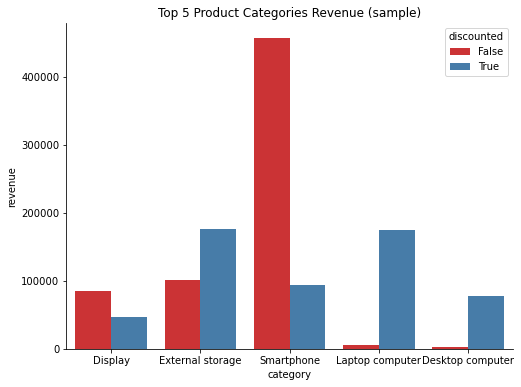

In [987]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = cat_samp, x = "category", y = "total_price", hue = "discounted", estimator = sum, 
            palette = "Set1", ci = None)
sns.despine()
plt.title("Top 5 Product Categories Revenue (sample)");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");
plt.savefig("ProdBarSamp.jpg", bbox_inches = "tight", dpi = 150)

In [985]:
discount_comp_brand_d = discount_comp_brand[discount_comp_brand.discounted == True]
discount_comp_brand_nd = discount_comp_brand[discount_comp_brand.discounted == False]
discount_brand_samp = discount_comp_brand_d.sample(n = 1722)
discount_brand_samp

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,promo_price,brand,category,order_id,created_date,total_paid,state,year,month,discount,discounted
249899,499394,1,APP2479,786.00,2018-01-26 20:53:51,786.00,Apple iPhone 64GB Gold 8,Apple iPhone 64GB 8 in Gold,809.00,793.00,Apple,Smartphone,499394.00,2018-01-26 21:06:47,792.99,Completed,2018,Jan,2.84,True
161617,440247,1,APP1086,213.99,2017-11-24 17:08:00,213.99,Apple iPod Touch 32GB Gold,New 6th generation iPod Touch 32GB with 8 megapixel camera.,232.81,224.00,Apple,Audio,440247.00,2017-11-24 17:24:05,217.98,Completed,2017,Nov,8.08,True
67001,358039,1,APP1997,29.74,2017-05-22 16:51:59,29.74,Apple iPhone Silicone Case Cover 7 Camelia,Ultrathin silicone case and microfiber premium for iPhone 7,39.00,33.99,Apple,Protection,358039.00,2017-05-22 16:59:16,49.73,Completed,2017,May,23.74,True
157102,436429,1,WAC0228,852.72,2017-11-23 23:48:41,852.72,"Cintiq Wacom Graphics Tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1080px) 87% Adobe RGB integrates Pen Pencil Pro 2-C...,1099.90,919.00,Wacom,Others,436429.00,2017-11-23 23:52:20,852.72,Completed,2017,Nov,22.47,True
154610,434281,1,APP2075,2948.59,2017-11-23 12:02:19,2948.59,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz | RAM 16GB | 512GB PCIe SSD | 560 4GB Radeon Pro S...",New MacBook Pro 15-inch Core i7 Touch Bar 29Ghz with 16GB of RAM and 512GB of SSD PCIe,3305.59,2999.00,Apple,Laptop computer,434281.00,2017-11-23 12:21:25,2948.59,Completed,2017,Nov,10.80,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131017,413843,7,WAC0171,51.99,2017-10-18 10:20:25,363.93,Education - Wacom Intuos graphics tablet with pen Draw S White,graphics tablet with pen and digital toolbox for Mac and PC.,79.99,62.30,Wacom,Others,413843.00,2017-10-18 10:22:40,368.92,Completed,2017,Oct,35.00,True
81027,370279,1,LAC0141,74.99,2017-06-29 11:40:30,74.99,LaCie Porsche Design 1TB External Hard Drive Mac and PC,External Hard Drive Mac and PC USB 3.0 1TB,79.99,77.79,LaCie,External storage,370279.00,2017-06-29 11:43:33,78.98,Completed,2017,Jun,6.25,True
209652,470872,1,APP0666,273.42,2017-12-24 18:47:42,273.42,AppleCare Protection MacBook Pro 15,Apple Care extended warranty MacBook Pro 15-inch and 15-inch MacBook Pro Retina,349.00,298.99,Apple,Protection,470872.00,2017-12-24 19:13:54,277.41,Completed,2017,Dec,21.66,True
83384,372254,1,APP2124,657.03,2017-07-03 23:10:15,657.03,"Apple iPad Pro 10.5 ""WiFi 256GB Silver",New iPad Pro 256GB Wi-Fi,899.00,872.00,Apple,Tablet,372254.00,2017-07-08 20:15:07,855.51,Completed,2017,Jul,26.92,True


In [986]:
brand_samp = pd.concat([discount_comp_brand_nd, discount_brand_samp])

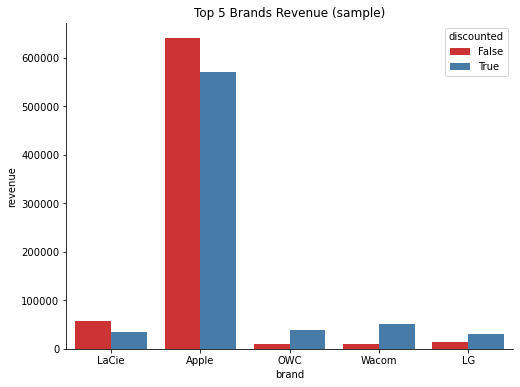

In [989]:
plt.subplots(figsize = (8, 6))
sns.barplot(data = brand_samp, x = "brand", y = "total_price", hue = "discounted", estimator = sum, 
            palette = "Set1", ci = None)
sns.despine()
plt.title("Top 5 Brands Revenue (sample)");
plt.ylabel("revenue");
plt.ticklabel_format(style = "plain", axis = "y");
plt.savefig("BrandBarSamp.jpg", bbox_inches = "tight", dpi = 150)